## Implementation of Polynomial Regression using Python

#### **Problem Description**: 
There is a Human Resource company, which is going to hire a new candidate. The candidate has told his previous salary 160K per annum, and the HR have to check whether he is telling the truth or bluff. So to identify this, they only have a dataset of his previous company in which the salaries of the top 10 positions are mentioned with their levels. By checking the dataset available, we have found that there is a non-linear relationship between the Position levels and the salaries. Our goal is to build a Bluffing detector regression model, so HR can hire an honest candidate. Below are the steps to build such a model.

### Steps for Polynomial Regression:

1. Data Pre-processing
2. Build a Linear Regression model and fit it to the dataset
3. Build a Polynomial Regression model and fit it to the dataset
4. Visualize the result for Linear Regression and Polynomial Regression model.
5. Predicting the output.

### Data Pre-processing Step:

In the Polynomial Regression model, we will not use feature scaling, and also we will not split our dataset into training and test set. It has two reasons:

The dataset contains very less information which is not suitable to divide it into a test and training set, else our model will not be able to find the correlations between the salaries and levels.
In this model, we want very accurate predictions for salary, so the model should have enough information.

In [1]:
# importing libraries  
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
# importing dataset
df=pd.read_csv("poly reg dataset.csv")
'imported successfully'

'imported successfully'

In [3]:
df

,Position,Level(X-variable),Salary(Y-Variable)
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, 1:2].values  
y= df.iloc[:, 2].values  

In [5]:
# independent variable
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
# dependent variable
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

### Building the Linear regression model:

In [7]:
#Fitting the Linear Regression to the dataset  
from sklearn.linear_model import LinearRegression  
lr= LinearRegression()  
lr.fit(x,y)  

LinearRegression()

### Building the Polynomial regression model:

In [8]:
 #Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  

LinearRegression()

After executing the code, we will get another matrix x_poly

In [9]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Next, we have used another LinearRegression object, namely lin_reg_2, to fit our x_poly vector to the linear model.

### Visualizing the result for Linear regression:

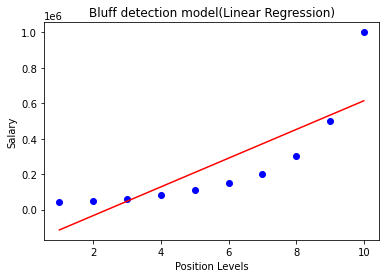

In [10]:
#Visulaizing the result for Linear Regression model  
plt.scatter(x,y,color="blue")  
plt.plot(x,lr.predict(x), color="red")  
plt.title("Bluff detection model(Linear Regression)")  
plt.xlabel("Position Levels")  
plt.ylabel("Salary")  
plt.show()  

In the above output image, we can clearly see that the regression line is so far from the datasets. Predictions are in a red straight line, and blue points are actual values. If we consider this output to predict the value of CEO, it will give a salary of approx. 600000$, which is far away from the real value.

So we need a curved model to fit the dataset other than a straight line.

### Visualizing the result for Polynomial Regression

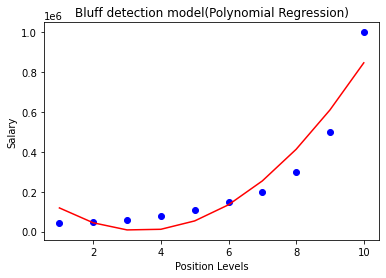

In [11]:
#Visulaizing the result for Polynomial Regression  
plt.scatter(x,y,color="blue")  
plt.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
plt.title("Bluff detection model(Polynomial Regression)")  
plt.xlabel("Position Levels")  
plt.ylabel("Salary")  
plt.show()  

As we can see in the above output image, the predictions are close to the real values. The above plot will vary as we will change the degree.

###### For degree= 3:

If we change the degree=3, then we will give a more accurate plot

In [12]:
poly_regs= PolynomialFeatures(degree= 3)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)

LinearRegression()

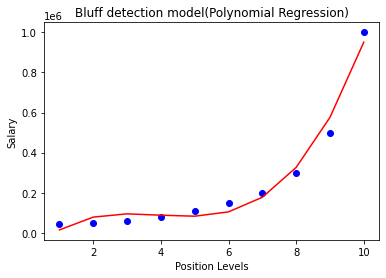

In [13]:
plt.scatter(x,y,color="blue")  
plt.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
plt.title("Bluff detection model(Polynomial Regression)")  
plt.xlabel("Position Levels")  
plt.ylabel("Salary")  
plt.show()  

##### Degree= 4: 
change the degree to 4, and now will get the most accurate plot. Hence we can get more accurate results by increasing the degree of Polynomial.

In [14]:
poly_regs= PolynomialFeatures(degree= 4)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)

LinearRegression()

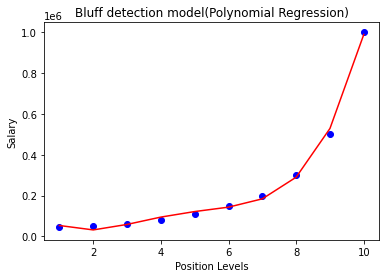

In [15]:
plt.scatter(x,y,color="blue")  
plt.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
plt.title("Bluff detection model(Polynomial Regression)")  
plt.xlabel("Position Levels")  
plt.ylabel("Salary")  
plt.show()  

### Predicting the final result with the Linear Regression model:

In [16]:
lin_pred = lr.predict([[6.5]])  
print(lin_pred)  

[330378.78787879]


### Predicting the final result with the Polynomial Regression model:

In [17]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[6.5]]))  
print(poly_pred)  

[158862.45265153]


In [18]:
df

,Position,Level(X-variable),Salary(Y-Variable)
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000
